## DAB200 -- Fall 2021 -- Lab 3

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14.csv |
| 4-6 | veh15.csv |
| 7-9 | veh16.csv |
| 10-12 | veh17.csv |
| 13-15 | veh18.csv |
| 16-17 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!
- After you write your code, make sure that you remove `raise NotImplementedError()`

### Part 0

Please provide the following information by editing this cell:
 - Group Number: 17
 - Group Members: Aashutosh Sehgal (0780170), Saheb Singh Bhatia (0781209)


### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

**Replace the value of `data_string` with the data for your group. Do not use the full path; only the name of the data.csv**. You won't need a full path if you put your csv file in the same folder where you put this notebook

In [1]:
data_string = 'veh18.csv'

**Code for reading data, isolating numeric features, and verifying that there are no missing values:**

In [2]:
# Importing all libraries and reading data from csv file.
# Using set_option() to restricting floating vales to only 3 decimal points.
# Using info() method to look at columns, their datatypes and NULL vales etc.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import category_encoders as ce
from rfpimp import *
pd.set_option('display.float_format', lambda x: '%.3f' % x)

veh = pd.read_csv(data_string)
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1163 non-null   float64
 1   # Cyl                              1163 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1163 non-null   float64
 3   # Gears                            1163 non-null   int64  
 4   Max Ethanol % - Gasoline           1163 non-null   float64
 5   Intake Valves Per Cyl              1163 non-null   int64  
 6   Exhaust Valves Per Cyl             1163 non-null   int64  
 7   Fuel Metering Sys Desc             1163 non-null   object 
 8   Air Aspiration Method Desc         1163 non-null   object 
 9   Trans Desc                         1163 non-null   object 
 10  Cyl Deact?                         1163 non-null   object 
 11  Var Valve Lift?                    1163 non-null   objec

In [3]:
# Keeping only the numerical fields from the data.

numfeatures = ['Eng Displ', '# Cyl', '# Gears', 'Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl','Comb Unadj FE - Conventional Fuel']
veh_num = veh[numfeatures]
veh_num.head(5)

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Comb Unadj FE - Conventional Fuel
0,5.200,12,8,10.000,2,2,22.844
1,4.000,8,8,10.000,2,2,26.660
2,6.000,12,8,10.000,2,2,20.432
3,6.000,12,8,10.000,2,2,21.338
4,1.500,3,6,10.000,2,2,36.763


In [4]:
# Making feature and target sets from the data frame.

X = veh_num.drop('Comb Unadj FE - Conventional Fuel', axis=1)
y = veh_num['Comb Unadj FE - Conventional Fuel']

#### Create and evaluate a baseline model:
Put all your code inside the function below. After your code is entered, running the function below must return the mean oob score. Do not provide any arguments to the function

In [5]:
# Splitting the dataset into training and testing.
# The random_state hyperparameter is used to keep the split similar each time and so that it does not affect r2 and oob scores.
# Creating empty lists to append values of the OOB Scores.

def estimate_mean_oob_score_baseline():
    oob_scores = []
    for i in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=123)
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 
        rf.fit(X_train, y_train)
        oob_scores.append(rf.oob_score_)
    return np.mean(oob_scores)

Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.

In [6]:
baseline_oob_score = estimate_mean_oob_score_baseline()

print(baseline_oob_score)


if data_string == 'veh14.csv':
    output = 0.803
elif  data_string == 'veh15.csv':
    output = 0.784
elif  data_string == 'veh16.csv':
    output = 0.780
elif  data_string == 'veh17.csv':
    output = 0.737
elif  data_string == 'veh18.csv':
    output = 0.697
elif  data_string == 'veh19.csv':
    output = 0.694
    

if np.isclose(baseline_oob_score , output, rtol = 0.01) == True:
    part1_marks = 15
    
assert np.isclose(baseline_oob_score , output, rtol = 0.01)


0.6945212535011893


### Part 2 - Convert non-numeric features to numeric

In this part you should: 
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 
 
You can create new cells to explore the feature values, but do not remove any existing cells
 
#### Code (25 marks)

In [7]:
# Sperating categorical fields.

nonnum = [col for col in veh.columns.tolist() if col not in numfeatures + ['Comb Unadj FE - Conventional Fuel']]
veh_nonnum = veh[nonnum]
veh_nonnum.head().T

,0,1,2,3,4
Fuel Metering Sys Desc,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition Direct Injection
Air Aspiration Method Desc,Turbocharged,Turbocharged,Naturally Aspirated,Naturally Aspirated,Turbocharged
Trans Desc,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic
Cyl Deact?,Y,N,N,N,N
Var Valve Lift?,N,N,N,N,Y


In [8]:
# Looking at number of unique values in each categorical column.

veh_nonnum.nunique(dropna=False)

Fuel Metering Sys Desc        3
Air Aspiration Method Desc    4
Trans Desc                    7
Cyl Deact?                    2
Var Valve Lift?               2
dtype: int64

In [9]:
# Looking at the unique values stored in each categorical column.

for col in veh_nonnum:
    print(veh_nonnum[col].unique())

['Multipoint/sequential fuel injection' 'Spark Ignition Direct Injection'
 'Spark Ignition direct & ported injection']
['Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged']
['Semi-Automatic' 'Manual'
 'Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Automatic' 'Automated Manual' 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)']
['Y' 'N']
['N' 'Y']


Put all your code for encoding the dataset in the cell below. It should contain all the required code for encoding all categorical features. 

You would want to explore the features first, but DO NOT do that in the cell below. You can create more cells to do the exploration. But the following cell must contain all the required encoding code only.

In [10]:
def encoded_dataframe():
    X = veh.drop(['Comb Unadj FE - Conventional Fuel'], axis=1)
    y = veh['Comb Unadj FE - Conventional Fuel']
    encoder1 = ce.OneHotEncoder(cols=['Fuel Metering Sys Desc'])
    encoder1.fit(X)
    X = encoder1.transform(X)
    encoder2 = ce.OrdinalEncoder(cols=['Air Aspiration Method Desc','Var Valve Lift?','Cyl Deact?','Trans Desc'])
    encoder2.fit(X)
    X = encoder2.transform(X)
    return X

Running the following cell should not throw any errors if your encoding code in the cell above is correct. Do not edit the following cell.

In [11]:
encoded_df = encoded_dataframe()


from pandas.api.types import is_numeric_dtype

cols_are_numeric = []
for col in encoded_df.columns:
    cols_are_numeric.append(is_numeric_dtype(encoded_df[col]))
    
    
if encoded_df.shape[1] == sum(cols_are_numeric):
    part2_marks = 25
    
assert encoded_df.shape[1] == sum(cols_are_numeric)


### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above 
 - estimate the mean oob score from 10 runs

#### Code (15 marks)

Put all your code in the function below. Do not provide any arguments to this function. This function must return:
- feature array
- target array
- mean oob score of 10 runs
- the fitted random forest model object

In [12]:
def estimate_mean_oob_score_final():
    # YOUR CODE HERE
    feature_array = encoded_df
    target_array = veh['Comb Unadj FE - Conventional Fuel']
    oob_scores = []
    for i in range(10):
        X_train, X_val, y_train, y_val = train_test_split(feature_array, target_array, test_size=0.2,random_state=123)
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 
        rftd=rf.fit(X_train, y_train)
        oob_scores.append(rf.oob_score_)
    return feature_array,target_array,np.mean(oob_scores),rftd

 Do not edit the following cell.

In [13]:
feature_array, target_array, final_oob_score, fitted_rf = estimate_mean_oob_score_final()

if final_oob_score > baseline_oob_score:
    part3_marks = 15    
    
assert final_oob_score > baseline_oob_score

### Part 4 - Lab Viva: Feature importances and comparison (10 marks)

This part will be discussed during the Lab Viva

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference) 
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features


In [14]:
# Calculating percentage difference.

((final_oob_score-baseline_oob_score) / final_oob_score) * 100

21.267362879663008

#### Based on the above results we can conclude that results improved in Part 3 as compared to Part 1.

In [15]:
# Looking at feature importance.

I = importances(fitted_rf, feature_array, target_array, features= list(feature_array.columns))
I

,Importance
Feature,
Eng Displ,0.689
Trans Desc,0.292
# Cyl,0.219
# Gears,0.121
Air Aspiration Method Desc,0.095
Var Valve Lift?,0.085
Max Ethanol % - Gasoline,0.066
Fuel Metering Sys Desc_3,0.011
Fuel Metering Sys Desc_1,0.009


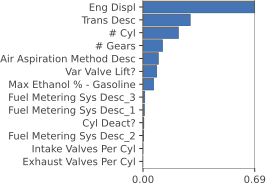

In [16]:
# Looking at feature importance plot.

plot_importances(I, color='#4575b4')

### Part 5: Lab Viva - Other questions (35)

These questions will be asked during the live session to individual members in your group.

- Explain the purpose of creating a baseline model. 
- Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. 
- Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

- The purpose of creating baseline model is to fit, train, predict and interpret the model only on the default numerical values and based on the output of interpretation decide if the model is working best on validation data.

- The use of ordinal encoder as the unique values in the columns were less than 10 and as instructed to use one column for OneHot Encoder we chose 'Air Aspiration Method Desc' column.

- Based on the feature importance plot above, we can remove 'Cyl Deact?','Intake Valves Per Cycle','Exhaust Valves Per Cyl' and 'Intake Valves Per Cyl' as they have less than 1% importance.

**Do not edit the following cells:**

In [17]:
parts_1_to_3_marks = part1_marks + part2_marks + part3_marks
parts_1_to_3_marks

# part4_marks =

# part5_marks = 

total_marks = parts_1_to_3_marks #+ part4_marks + part5_marks
total_marks

55